In [4]:
import regex
import os
import matplotlib.pyplot as plt

In [5]:
bill_filenames = []
for file in os.listdir("ustawy"):
    if file.endswith(".txt"):
        bill_filenames.append(os.path.join("ustawy", file))

In [6]:
result = {}
bill_mentions = 0
bill_frm_day_mentions = 0
bill_not_frm_day_mentions = 0
bill_not_chg_mentions = 0


for bill_name in bill_filenames:
    year = int(bill_name[7:11])
    if year not in result:
        result[year] = {'add': 0, 'rem': 0, 'chg': 0}
    with open(bill_name) as b_file:
        add_p = regex.compile('dodaje się (?:ust|pkt|art|§)', regex.IGNORECASE)
        rem_p = regex.compile('skreśla się (?:§|art.|ust.|pkt)', regex.IGNORECASE)
        chg_p = regex.compile('(?:§|art.|ust.|pkt) [0-9]+ otrzymuje brzmienie', regex.IGNORECASE)
        
        bill_p = regex.compile('(?:\\bustawa\\b|\\bustawy\\b|\\bustawie\\b|\\bustawę\\b'\
                               '|\\bustawą\\b|\\bustawo\\b|\\bustawy\\b|\\bustaw\\b'\
                               '|\\bustawom\\b|\\bustawami\\b|\\bustawach\\b)', regex.IGNORECASE)
        
        bill_frm_day = regex.compile('(?:\\bustawa\\b|\\bustawy\\b|\\bustawie\\b|\\bustawę\\b'\
                               '|\\bustawą\\b|\\bustawo\\b|\\bustawy\\b|\\bustaw\\b'\
                               '|\\bustawom\\b|\\bustawami\\b|\\bustawach\\b)'\
                               '(?= z dnia)', regex.IGNORECASE)
        
        bill_not_frm_day = regex.compile('(?:\\bustawa\\b|\\bustawy\\b|\\bustawie\\b|\\bustawę\\b'\
                               '|\\bustawą\\b|\\bustawo\\b|\\bustawy\\b|\\bustaw\\b'\
                               '|\\bustawom\\b|\\bustawami\\b|\\bustawach\\b)'\
                               '(?! z dnia)', regex.IGNORECASE)
        
        bill_not_chg = regex.compile('(?:\\bustawa\\b|\\bustawy\\b|\\bustawie\\b|\\bustawę\\b'\
                               '|\\bustawą\\b|\\bustawo\\b|\\bustawy\\b|\\bustaw\\b'\
                               '|\\bustawom\\b|\\bustawami\\b|\\bustawach\\b)'\
                               '(?! o zmianie)', regex.IGNORECASE)

        for line in b_file:
            add_matches = add_p.findall(line)
            rem_matches = rem_p.findall(line)
            chg_matches = chg_p.findall(line)

            result[year]['add'] += len(add_matches)
            result[year]['rem'] += len(rem_matches)
            result[year]['chg'] += len(chg_matches)
            
            bill_matches = bill_p.findall(line)
            bill_mentions += len(bill_matches)
            
            bill_frm_day_matches = bill_frm_day.findall(line)
            bill_frm_day_mentions += len(bill_frm_day_matches)
            
            bill_not_frm_day_matches = bill_not_frm_day.findall(line)
            bill_not_frm_day_mentions += len(bill_not_frm_day_matches)
            
            bill_not_chg_matches = bill_not_chg.findall(line)
            bill_not_chg_mentions += len(bill_not_chg_matches)




In [7]:
result = dict(sorted(result.items()))

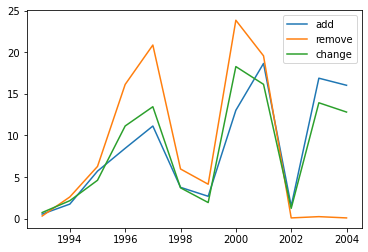

In [8]:
fig = plt.figure()
ax = plt.axes()
X = list(result.keys())

total_add = sum([y['add'] for y in result.values()])
total_rem = sum([y['rem'] for y in result.values()])
total_chg = sum([y['chg'] for y in result.values()])


add_Y = [y['add']/total_add*100 for y in result.values()]
rem_Y = [y['rem']/total_rem*100 for y in result.values()]
chg_Y = [y['chg']/total_chg*100 for y in result.values()]


ax.plot(X, add_Y, label="add")
ax.plot(X, rem_Y, label="remove")
ax.plot(X, chg_Y, label="change")
ax.legend()

Możemy zauważyć tendencje związane z poszczególnymi latami, które mają swoje odzwierciedlenie w każdej z kategorii. Przez cały okres do roku 2002 tendencje wszystkich kategorii były takie same, natomiast po 2002 znacząco spadła liczba usuwanych zapisów.
Możemy dostrzec znaczący wzrost prac ustawodawczych w latach bezpośrednio przed wyborami parlamentarnymi (1997, 2001) i spadek po.

In [9]:
bill_mentions

25092

In [10]:
bill_frm_day_mentions

6979

In [11]:
bill_not_frm_day_mentions

18113

In [12]:
bill_mentions == bill_frm_day_mentions + bill_not_frm_day_mentions

True

Wynik się zgadza, wystąpienia ze słowami "z dnia" oraz te bez sumują się to całkowitej liczby wystąpień słowa ustawa (w różnych odmianach).

In [13]:
bill_not_chg_mentions

25064

<BarContainer object of 1 artists>

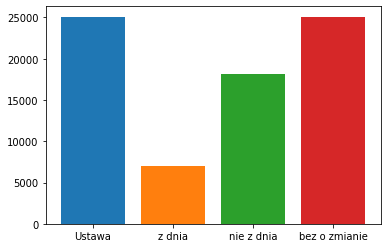

In [14]:
bfig = plt.figure()

plt.bar('Ustawa',bill_mentions)
plt.bar('z dnia', bill_frm_day_mentions)
plt.bar('nie z dnia', bill_not_frm_day_mentions)
plt.bar('bez o zmianie', bill_not_chg_mentions)

Wystąpień słowa "ustawa" bez  "o zmianie" jest prawie tyle samo co wystąpień samego słowa "ustawa"

In [15]:
bill_mentions-bill_not_chg_mentions

28